In [5]:
import data_dataloader as dl
import matplotlib.pyplot as plt
import torchvision
import torch
import torch.nn as nn

In [59]:
trainload, validload = dl.get_loaders('2k2sec',mode=0)

2000 images from the dataset
1400 600


In [60]:
dataiter_tr = iter(trainload)
dataiter_vl = iter(validload)
images_t, labels_t, lengths_t = dataiter_tr.next()
# images_v, labels_v = dataiter_vl.next()

torch.Size([3, 128, 256])
tensor([22,  3,  1, 16,  3,  9, 10,  2,  1, 11,  4,  7,  2, 17,  3, 12,  4,  1,
        12,  2, 16, 21, 10,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0])
tensor(25)


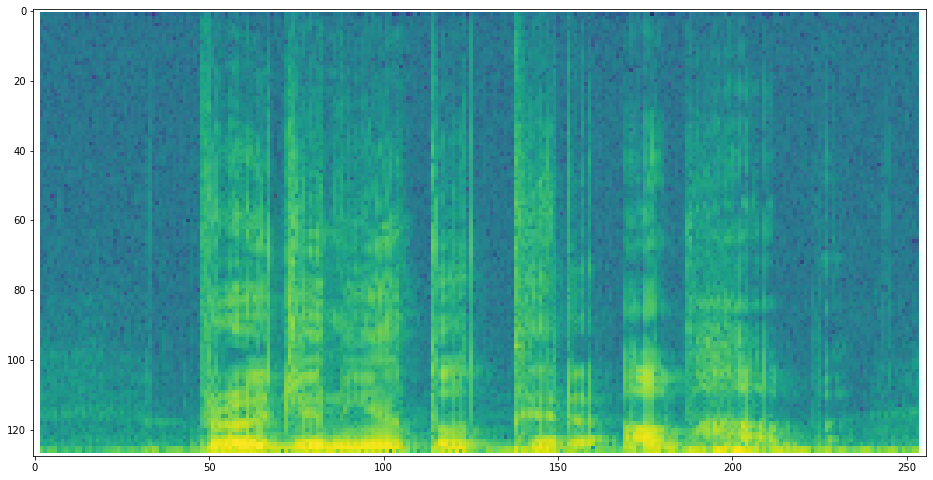

In [61]:
plt.figure(figsize=(16,16))
dl.torchimshow(images_t[0])
print(images_t[1].shape)
print(labels_t[1])
print(lengths_t[1])

In [47]:
import numpy as np
from torch.utils import data as D

In [48]:
nplabels = np.load('kothaddekha_LabelArray_2k2sec.npy',allow_pickle=True)
nplenths = np.load('kothaddekha_LenthArray_2k2sec.npy')

In [50]:
print(nplabels[0])
print(nplenths[0])
print(len(nplabels[0]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
-1
44


In [55]:
dataset = dl.KD_DL('2k2sec','')
loader = D.DataLoader(dataset, batch_size=32, shuffle=False, num_workers=0)
dataiter = iter(loader)
images, labels, lens = dataiter.next()

In [56]:
print(images[1].shape)
print(labels[1].shape)
print(lens[1])

torch.Size([3, 128, 256])
torch.Size([44])
tensor(18)


In [57]:
# print(images[1].shape)
print(labels[1])

tensor([19,  2,  6, 19, 10,  2, 14,  4,  1,  8,  4, 17,  5, 13,  8,  6, 17,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0])


In [6]:
T = 50      # Input sequence length
C = 20      # Number of classes (including blank)
N = 16      # Batch size
S = 30      # Target sequence length of longest target in batch
S_min = 10  # Minimum target length, for demonstration purposes

# Initialize random batch of input vectors, for *size = (T,N,C)
input = torch.randn(T, N, C).log_softmax(2).detach().requires_grad_()

# Initialize random batch of targets (0 = blank, 1:C = classes)
target = torch.randint(low=1, high=C, size=(N, S), dtype=torch.long)

input_lengths = torch.full(size=(N,), fill_value=T, dtype=torch.long)

print(input_lengths)


target_lengths = torch.randint(low=S_min, high=S, size=(N,), dtype=torch.long) 

ctc_loss = nn.CTCLoss()
loss = ctc_loss(input, target, input_lengths, target_lengths)
loss.backward()

tensor([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50])


In [2]:
import data_dataloader as dl
dl.saveimagesasnpy()
import numpy as np
l = np.load('kothaddekha_LabelArray_2k2sec.npy')
print(l[1])
print(len(l[1]))

lfn: 2000
lbl: 2000
lln: 2000
lll: 43
0 imgs added to array
100 imgs added to array
200 imgs added to array
300 imgs added to array
400 imgs added to array
500 imgs added to array
600 imgs added to array
700 imgs added to array
800 imgs added to array
900 imgs added to array
1000 imgs added to array
1100 imgs added to array
1200 imgs added to array
1300 imgs added to array
1400 imgs added to array
1500 imgs added to array
1600 imgs added to array
1700 imgs added to array
1800 imgs added to array
1900 imgs added to array
10023 14 [11, 5, 16, 4, 3, 2, 1, 15, 5, 6, 15, 4, 12, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10024 17 [19, 2, 6, 19, 10, 2, 14, 4, 1, 8, 4, 17, 5, 13, 8, 6, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10922 18 [9, 10, 4, 16, 16, 5, 1, 9, 10, 4, 16, 16, 5, 1, 2, 9, 3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[19  2  6 19 10  2 14  4  1  8  4 17  5